In [16]:
pip install plotnine

  Obtaining dependency information for plotnine from https://files.pythonhosted.org/packages/eb/c1/fcc5985eee6511aa321e68c8f813d9fdbe1b506713a95d4f612a5f963270/plotnine-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for mizani<0.10.0,>0.9.0 from https://files.pythonhosted.org/packages/e2/95/d4e33d3f5bc9fee5512637661208b6b595bda58e9b6a66fa867137761dd7/mizani-0.9.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 13.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Part One: Data Exploration
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

Age of primary beneficiary

Gender of primary beneficiary (only female, male recorded)

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Whether the beneficiary smokes

The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

1. Read in the dataset, and display some summaries of the data.

In [1]:
import pandas as pd

In [49]:
myData = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')
myData

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


In [3]:
summary = myData.describe()
print(summary)

              age         bmi       charges
count  431.000000  431.000000    431.000000
mean    37.960557   30.768898  12297.098118
std     16.363909    6.111362  11876.527128
min     18.000000   15.960000   1131.506600
25%     22.000000   26.357500   2710.444575
50%     34.000000   30.590000   9866.304850
75%     55.000000   35.272500  14510.872600
max     64.000000   49.060000  55135.402090


In [4]:
unique_values = myData['region'].unique()
unique_values

array(['southwest', 'northwest', 'southeast', 'northeast'], dtype=object)

2. Fix any concerns you have about the data.

I will drop all the nan rows

In [5]:
myData.dropna(inplace=True)

3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [6]:
from plotnine import ggplot, geom_point, aes, geom_boxplot, geom_bar, labs, ggtitle, scale_fill_manual

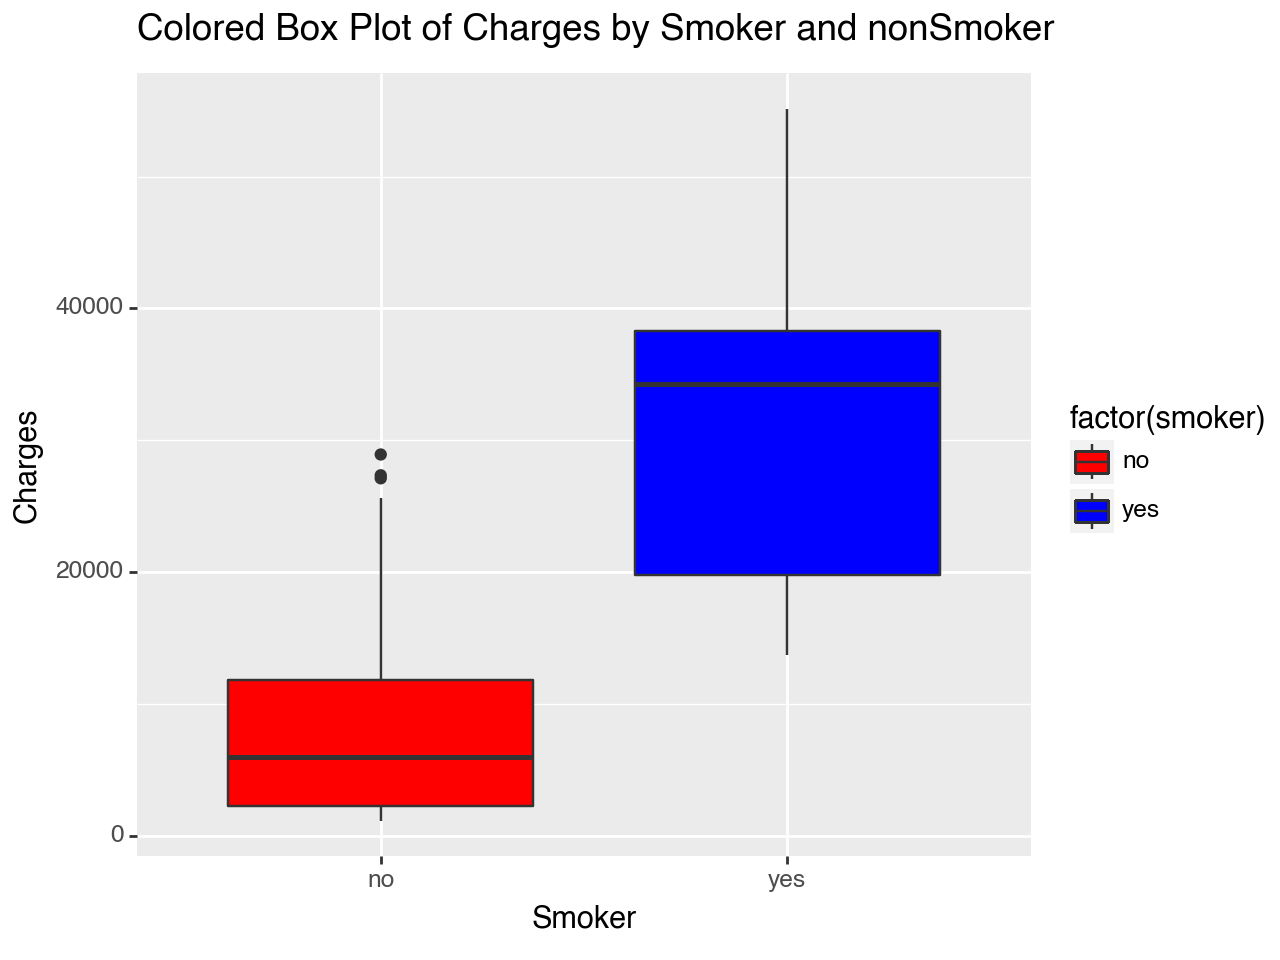

In [7]:
graph_one = ggplot(aes(x='factor(smoker)', y='charges', fill='factor(smoker)'), myData) + \
    geom_boxplot() + \
    scale_fill_manual(values=["red", "blue"]) + \
    labs(x='Smoker', y='Charges') + \
    ggtitle('Colored Box Plot of Charges by Smoker and nonSmoker')
print (graph_one)


It is clear that the charges for smoker is higher than nonsmoker. The median for smoker is higher the one for nonsmoker by approximately 15000 dollar. On the other hand, there are still some overlaps between the two groups.

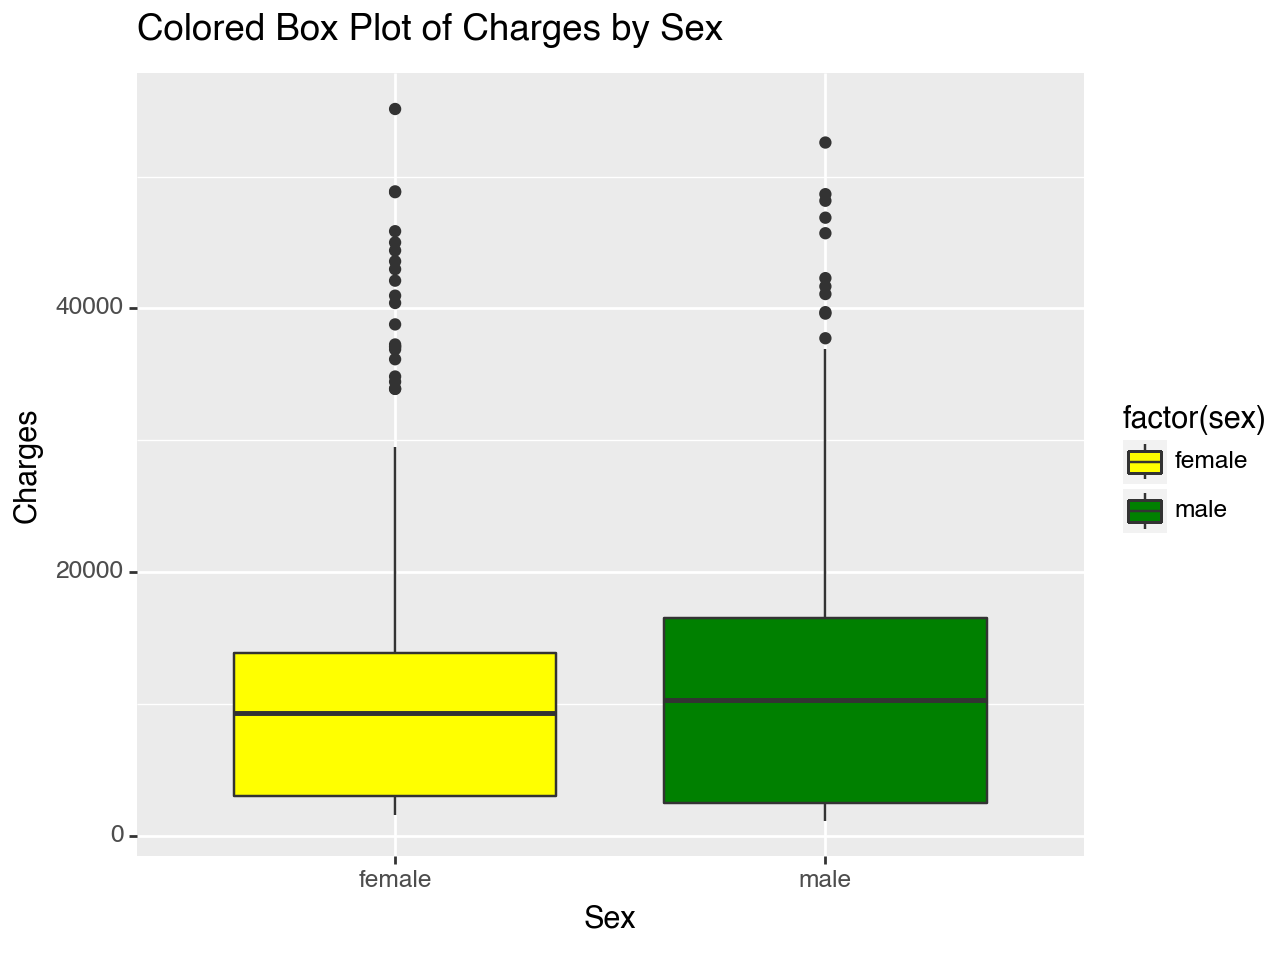

In [8]:
graph_two = ggplot(aes(x='factor(sex)', y='charges', fill='factor(sex)'), myData) + \
    geom_boxplot() + \
    scale_fill_manual(values=["yellow", "green"]) + \
    labs(x='Sex', y='Charges') + \
    ggtitle('Colored Box Plot of Charges by Sex')
print (graph_two)

We can tell that the chargers between male and female are not significantly different from each other. Males median charges are higher slightly. In addition, females' highest charge is higher than the males' highest charge.

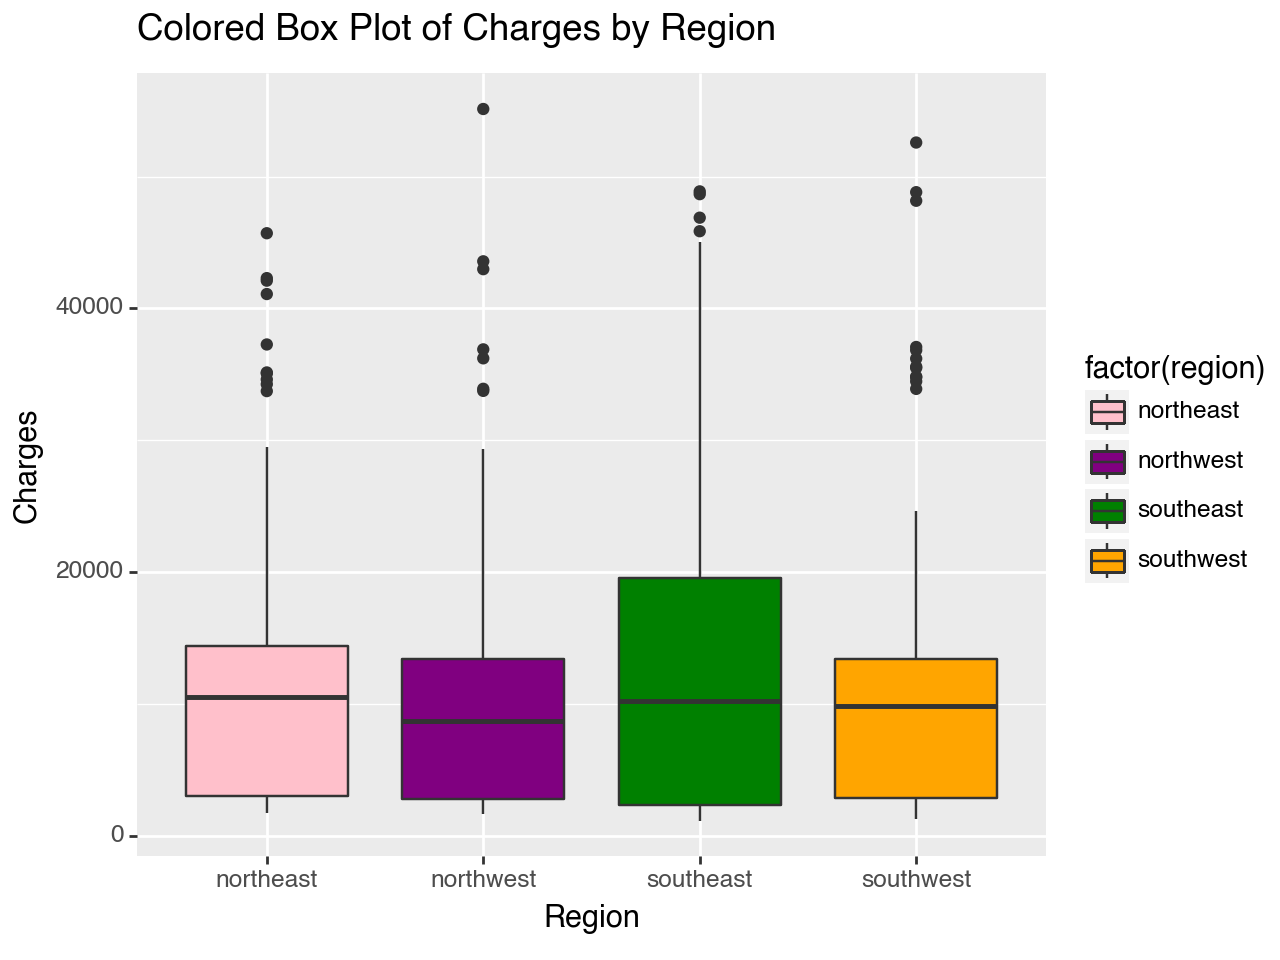

In [9]:
graph_three = ggplot(aes(x='factor(region)', y='charges', fill='factor(region)'), myData) + \
    geom_boxplot() + \
    scale_fill_manual(values=["pink", "purple", "green", "orange"]) + \
    labs(x='Region', y='Charges') + \
    ggtitle('Colored Box Plot of Charges by Region')
print (graph_three)

It seems like charges don't vary greatly with different regions either. Northeast region has the highest median out of the four groups and southeast region seems to have the biggest variation (25th percentile to 75th percentile distance is the greatest out of the four groups.)

Part Two: Simple Linear Models
1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [10]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_bar,scale_y_continuous, geom_line
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [11]:
x = myData[['age']]
y = myData['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

lr = LinearRegression()

my_pipeline = Pipeline(
    [('ols', lr)]
)


fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline

fitted_pipeline.named_steps['ols'].coef_

array([248.29564695])

In [12]:
fitted_pipeline.named_steps['ols'].intercept_

2743.059643189654

In [13]:
y_preds_1 = fitted_pipeline.predict(x_test)
r2 = r2_score(y_test, y_preds_1)
r2

0.040083278453343696

We got this model: Charges = Agex214+4305. This is a simple linear model with only ages being a dependent variables to predict charges. With every additional years old increased in ages, the expected charges will increase by 214. If someone is 0 years old, the expected insurance charges will be 4305. I got a r-square value of 14% in this model which seems terrible, meaning only 14% of the charges value can be explained with this model. Considered this model is a simple linear model with one variable, such low r-square is somewhat expected.

2. Make a model that also incorporates the variable sex. Report your results.

In [14]:
sex_dummies = pd.get_dummies(myData['sex'])
myData = pd.concat([myData, sex_dummies.astype(int)], axis=1)
myData

,age,sex,bmi,smoker,region,charges,female,male
0,19,female,27.900,yes,southwest,16884.92400,1,0
1,33,male,22.705,no,northwest,21984.47061,0,1
2,32,male,28.880,no,northwest,3866.85520,0,1
3,31,female,25.740,no,southeast,3756.62160,1,0
4,60,female,25.840,no,northwest,28923.13692,1,0
...,...,...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733,1,0
427,18,female,31.920,no,northeast,2205.98080,1,0
428,18,female,36.850,no,southeast,1629.83350,1,0
429,21,female,25.800,no,southwest,2007.94500,1,0


In [15]:
x = myData[['age', 'female']]
y = myData['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

x_train

lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
lr_fit.coef_

array([  205.5713779 , -1145.47485402])

In [17]:
lr_fit.intercept_

4913.712979372731

In [18]:
y_pred_2 = lr_fit.predict(x_test)
r2 = r2_score(y_test, y_pred_2)
r2

0.13611506258426254

This model turns out to look like: charges = 3774 + 231 x age - 736 x female.
It has an r2 of 8%, which decreased by 5% from our previos simple linear model with only age. Adding female is a worse idea than just having age itself. 
With an additional year old increased in age, charges go up by 231. If it's a female, the charges is expected be lower than male by 736.

3. Now make a model that does not include sex, but does include smoker. Report your results

In [50]:
smoker_dummies = pd.get_dummies(myData['smoker'])
myData = pd.concat([myData, smoker_dummies.astype(int)], axis=1)
myData = myData.rename(columns={'no': 'nonsmoker'})
myData = myData.rename(columns={'yes': 'yessmoker'})
myData

,age,sex,bmi,smoker,region,charges,nonsmoker,yessmoker
0,19,female,27.900,yes,southwest,16884.92400,0,1
1,33,male,22.705,no,northwest,21984.47061,1,0
2,32,male,28.880,no,northwest,3866.85520,1,0
3,31,female,25.740,no,southeast,3756.62160,1,0
4,60,female,25.840,no,northwest,28923.13692,1,0
...,...,...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733,1,0
427,18,female,31.920,no,northeast,2205.98080,1,0
428,18,female,36.850,no,southeast,1629.83350,1,0
429,21,female,25.800,no,southwest,2007.94500,1,0


In [20]:
x = myData[['age', 'yessmoker']]
y = myData['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

x_train

lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
lr_fit.coef_

array([  268.60131317, 23691.64360076])

In [21]:
lr_fit.intercept_

-2769.7996931153866

In [22]:
y_pred_3 = lr_fit.predict(x_test)
r2 = r2_score(y_test, y_pred_3)
r2

0.7525026255334302

This model looks like: charges = -2450 + 46 x age + 24662 x smoker
r2 is 75% for this model which is way higher than the previous models. 
With an addition year old increased in age, charges go up by 46.
If the person is smoker, its expected charges go up by 24662 compared to a nonsmoker.

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse2 = mean_squared_error(y_test, y_pred_2)
mse3 = mean_squared_error(y_test, y_pred_3)
mse2

163598963.2938496

In [25]:
mse3

35875674.65780529

In [26]:
mse3-mse2

-127723288.6360443

My model 3 has a higher mse value, however, it also had a way higher r2 value (I calculated r2 in the previous parts). A higher r2 should come with a lower mse, which is not the case here. mse and r2 are contradicting each other probably because futher analysis is needed, our models so far are probably too simplel. However, I think I will go with my model 3 if I have to choose between the two, because an r2 of 75% is way better than 8%. 

Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [27]:
x = myData[['age', 'bmi']]
y = myData['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

x_train

lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_pred_4 = lr_fit.predict(x_test)
r2 = r2_score(y_test, y_pred_4)
r2

0.16130460249254164

In [28]:
mse4 = mean_squared_error(y_test, y_pred_4)
mse4

125982654.22687463

r2 is better than model 2 but not model 3. mse seems to be lower than both model 2 and 3 though.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [29]:
myData['age_squared'] = myData['age'] ** 2

In [30]:
x = myData[['age', 'age_squared']]
y = myData['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

x_train

lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_pred_5 = lr_fit.predict(x_test)
r2 = r2_score(y_test, y_pred_5)
r2

0.16614679455815184

In [31]:
mse5 = mean_squared_error(y_test, y_pred_5)
mse5

122332458.64854422

It got a lower r2 and a higher mse.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?



In [32]:
x = myData[['age']]
y = myData['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

#4 degree
lr = LinearRegression()
ct = ColumnTransformer([('4 degree', PolynomialFeatures(degree = 4, include_bias = False), ['age'])])


my_pipeline = Pipeline(
    [('4 degree',ct),('ols', lr)]
)
fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline
y_pred_6= fitted_pipeline.predict(x_test)
r2 = r2_score(y_test, y_pred_6)
r2

0.10468926886385654

In [33]:
mse6 = mean_squared_error(y_test, y_pred_6)
mse6

129471181.7128997

lower r2 and higher mse than P2 Q1

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [34]:
#12 degree
lr = LinearRegression()
ct = ColumnTransformer([('12 degree', PolynomialFeatures(degree = 12, include_bias = False), ['age'])])


my_pipeline = Pipeline(
    [('12 degree',ct),('ols', lr)]
)
fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline
y_pred_7= fitted_pipeline.predict(x_test)
r2 = r2_score(y_test, y_pred_7)
r2

0.1043728031669473

In [35]:
mse7 = mean_squared_error(y_test, y_pred_7)
mse7

129516945.92226915

lower r2 and higher mse than P2 Q1

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

I think so far the best model is my model 3 which uses age and smoker. It has a much higher r2 compared with the rest of the other models. However, there are problem with this model as it generates higher mse compared with most of the others. I would say this is the best model out of the one I made so far, but certainly not the best model out there because we only used two variables. I think other variables like bmi and region certainly can tell you information about the expected charges and we should try to include them.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.



In [36]:
x_test['y_pred_7']=y_pred_7
x_test['y_test']=y_test
x_test

,age,y_pred_7,y_test
114,46,13984.025303,24603.04837
346,55,14533.544554,10594.50155
328,34,11558.411047,4500.33925
335,51,14207.060959,8798.59300
183,37,12410.257324,19214.70553
...,...,...,...
54,18,8088.402510,1694.79640
198,22,8511.273282,1664.99960
243,51,14207.060959,9875.68040
192,25,9055.608276,17878.90068


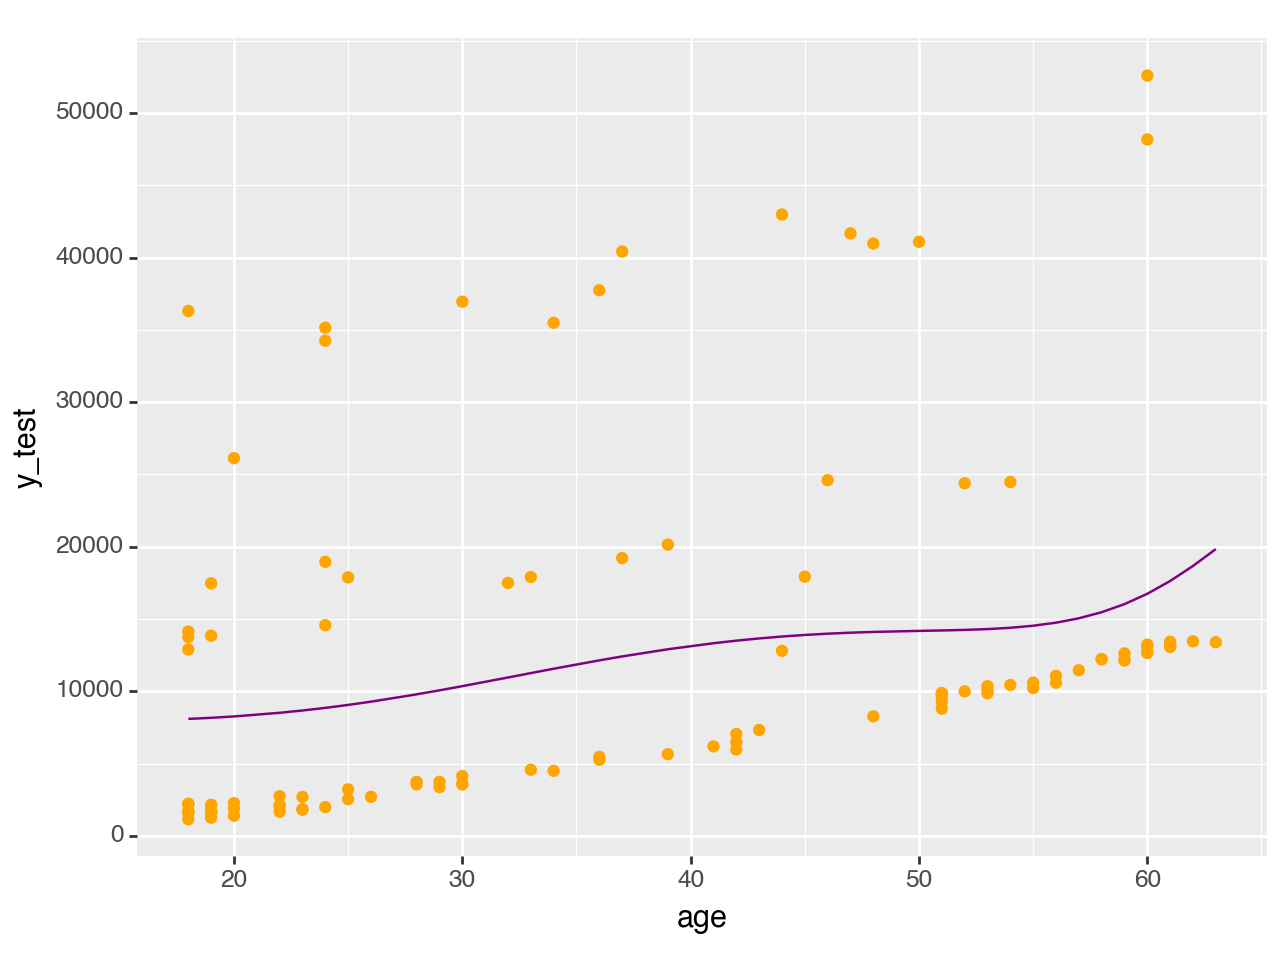

<Figure Size: (640 x 480)>

In [37]:
graph_prediction = (ggplot(x_test, aes(x='age')) +
     geom_point(aes(y='y_test'), color='orange') +
     geom_line(aes(y='y_pred_7'), color='purple')
                   )


graph_prediction

Part Four: New data
Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [38]:
NewData = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')
NewData

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400
139,45,male,30.360,yes,southeast,62592.87309
140,43,male,27.800,yes,southwest,37829.72420
141,24,female,27.720,no,southeast,2464.61880


Only age as a predictor.

In [39]:
x_train = myData[['age']]
y_train = myData['charges']
x_test = NewData[['age']]
y_test = NewData['charges']
lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_pred_8 = lr_fit.predict(x_test)
mse8 = mean_squared_error(y_test, y_pred_8)
mse8

136077136.50195494

age and bmi as a predictor.



In [40]:
x_train = myData[['age','bmi']]
y_train = myData['charges']
x_test = NewData[['age','bmi']]
y_test = NewData['charges']
lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_pred_9 = lr_fit.predict(x_test)
mse9 = mean_squared_error(y_test, y_pred_9)
mse9

132636406.11081287

age, bmi, and smoker as predictors (no interaction terms)

In [43]:
smoker_dummies = pd.get_dummies(NewData['smoker'])
NewData = pd.concat([NewData, smoker_dummies.astype(int)], axis=1)
NewData = NewData.rename(columns={'no': 'nonsmoker'})
NewData = NewData.rename(columns={'yes': 'yessmoker'})
NewData

,age,sex,bmi,smoker,region,charges,nonsmoker,yessmoker
0,23,male,34.400,no,southwest,1826.84300,1,0
1,56,male,40.300,no,southwest,10602.38500,1,0
2,18,male,34.100,no,southeast,1137.01100,1,0
3,63,female,23.085,no,northeast,14451.83515,1,0
4,63,male,28.310,no,northwest,13770.09790,1,0
...,...,...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400,0,1
139,45,male,30.360,yes,southeast,62592.87309,0,1
140,43,male,27.800,yes,southwest,37829.72420,0,1
141,24,female,27.720,no,southeast,2464.61880,1,0


In [51]:
x_train = myData[['age','bmi','nonsmoker']]
y_train = myData['charges']
x_test = NewData[['age','bmi','nonsmoker']]
y_test = NewData['charges']
lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_pred_10 = lr_fit.predict(x_test)
mse10 = mean_squared_error(y_test, y_pred_10)
mse10

35377541.241416305

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [52]:
myData['interact_age_nonsmoker'] = myData['age']*myData['nonsmoker']
NewData['interact_age_nonsmoker'] = NewData['age']*NewData['nonsmoker']
myData['interact_bmi_nonsmoker'] = myData['bmi']*myData['nonsmoker']
NewData['interact_bmi_nonsmoker'] = NewData['bmi']*NewData['nonsmoker']

In [53]:
x_train = myData[['age','bmi','interact_age_nonsmoker','interact_bmi_nonsmoker']]
y_train = myData['charges']
x_test = NewData[['age','bmi','interact_age_nonsmoker','interact_bmi_nonsmoker']]
y_test = NewData['charges']
lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_pred_11 = lr_fit.predict(x_test)
mse11 = mean_squared_error(y_test, y_pred_10)
mse11

35377541.241416305

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [54]:
x_train = myData[['age','bmi','nonsmoker','interact_age_nonsmoker','interact_bmi_nonsmoker']]
y_train = myData['charges']
x_test = NewData[['age','bmi','nonsmoker','interact_age_nonsmoker','interact_bmi_nonsmoker']]
y_test = NewData['charges']
lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_pred_12 = lr_fit.predict(x_test)
mse12 = mean_squared_error(y_test, y_pred_12)
mse12

21786256.866852585

In [55]:
min(mse8,mse9,mse10,mse11,mse12)

21786256.866852585

the model with age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker is the best to use out of the five, as it has the smallest mse.

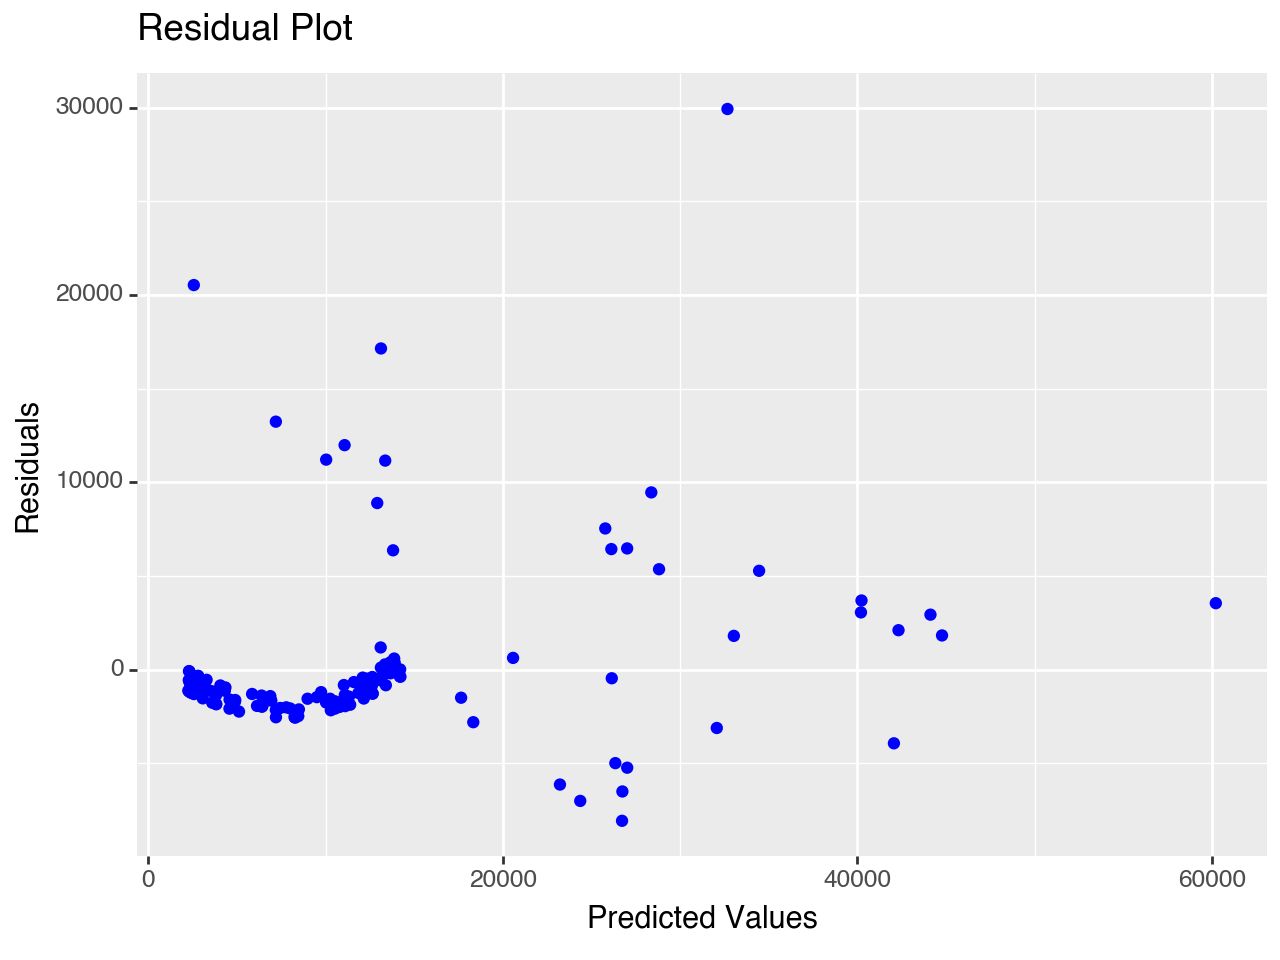

In [56]:
residuals = y_test - y_pred_12

residual_plot = ggplot(aes(x='y_pred_12', y=residuals)) + \
    geom_point(color='blue') + \
    labs(title='Residual Plot', x='Predicted Values', y='Residuals')

print(residual_plot)

Part Five: Full Exploration
Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

I think I should always have smoker in my model because out of all the previous models, smoker one did the best on predicting.

first, i will tune models with smoker and bmi. Bmi will be explored with different polynomial degree.

In [58]:
from sklearn.model_selection import GridSearchCV

In [63]:
X_train = myData.drop('charges', axis =1)
Y_train = myData['charges']
X_test = NewData.drop('charges', axis =1)
Y_test = NewData['charges']

In [70]:
ct_poly = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
    ("polynomial", PolynomialFeatures(), ["bmi"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}

gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

In [71]:
gscv_fitted = gscv.fit(X_train, Y_train)
gscv_fitted.cv_results_['mean_test_score']

array([0.66909761, 0.66847945, 0.66871777, 0.66716946, 0.65346369,
       0.62461328, 0.59323237, 0.59695338, 0.59641413])

In [72]:
pd.DataFrame(data = {"degrees": np.arange(1, 10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.669098
1,2,0.668479
2,3,0.668718
3,4,0.667169
4,5,0.653464
5,6,0.624613
6,7,0.593232
7,8,0.596953
8,9,0.596414


second, i will tune models with smoker and age. Bmi will be explored with different polynomial degree.

In [74]:
ct_poly = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
    ("polynomial", PolynomialFeatures(), ["age"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}

gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X_train, Y_train)
gscv_fitted.cv_results_['mean_test_score']

pd.DataFrame(data = {"degrees": np.arange(1, 10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.759764
1,2,0.759154
2,3,0.759133
3,4,0.758188
4,5,0.756983
5,6,0.755166
6,7,0.756940
7,8,0.756599
8,9,0.067869


third, i will tune models with smoker and age and bmi. Bmi and age will be explored with different polynomial degree.

In [76]:
ct_poly = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
    ("polynomial", PolynomialFeatures(), ["age",'bmi'])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}

gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X_train, Y_train)
gscv_fitted.cv_results_['mean_test_score']

pd.DataFrame(data = {"degrees": np.arange(1, 10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.779976
1,2,0.777935
2,3,0.778388
3,4,0.772965
4,5,0.767988
5,6,0.707069
6,7,0.724393
7,8,0.717200
8,9,-394.108119


forth, i will tune models with smoker, region and age and bmi. Bmi and age will be explored with different polynomial degree.

In [78]:
ct_poly = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker",'region']),
    ("polynomial", PolynomialFeatures(), ["age",'bmi'])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}

gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X_train, Y_train)
gscv_fitted.cv_results_['mean_test_score']

pd.DataFrame(data = {"degrees": np.arange(1, 10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.778919
1,2,0.776730
2,3,0.777202
3,4,0.771586
4,5,0.767052
5,6,0.707910
6,7,0.720202
7,8,0.697555
8,9,-251.205458


fifth, i will try just smoker and sex and age.

In [79]:
ct_poly = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker",'sex']),
    ("polynomial", PolynomialFeatures(), ["age"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}

gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X_train, Y_train)
gscv_fitted.cv_results_['mean_test_score']

pd.DataFrame(data = {"degrees": np.arange(1, 10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.759848
1,2,0.759306
2,3,0.759241
3,4,0.758403
4,5,0.757180
5,6,0.755369
6,7,0.757098
7,8,0.756788
8,9,0.067863


sixth, i will try smoker, sex, and bmi.

In [80]:
ct_poly = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker",'sex']),
    ("polynomial", PolynomialFeatures(), ["bmi"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}

gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

gscv_fitted = gscv.fit(X_train, Y_train)
gscv_fitted.cv_results_['mean_test_score']

pd.DataFrame(data = {"degrees": np.arange(1, 10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.668879
1,2,0.667905
2,3,0.668104
3,4,0.666406
4,5,0.652715
5,6,0.623707
6,7,0.592006
7,8,0.595718
8,9,0.598657


The best model out of the one I tried is age + bmi + smoker, it gives me a r2 of 78%, which is higher than the highest model from part 1 to 4 (75%). I think 78% of R2 is showing that it is a pretty decent model to use to predict the charges.

In [82]:
x_train = myData[['age','bmi','nonsmoker']]
y_train = myData['charges']
x_test = NewData[['age','bmi','nonsmoker']]
y_test = NewData['charges']
lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)
y_preds = lr_fit.predict(x_test)

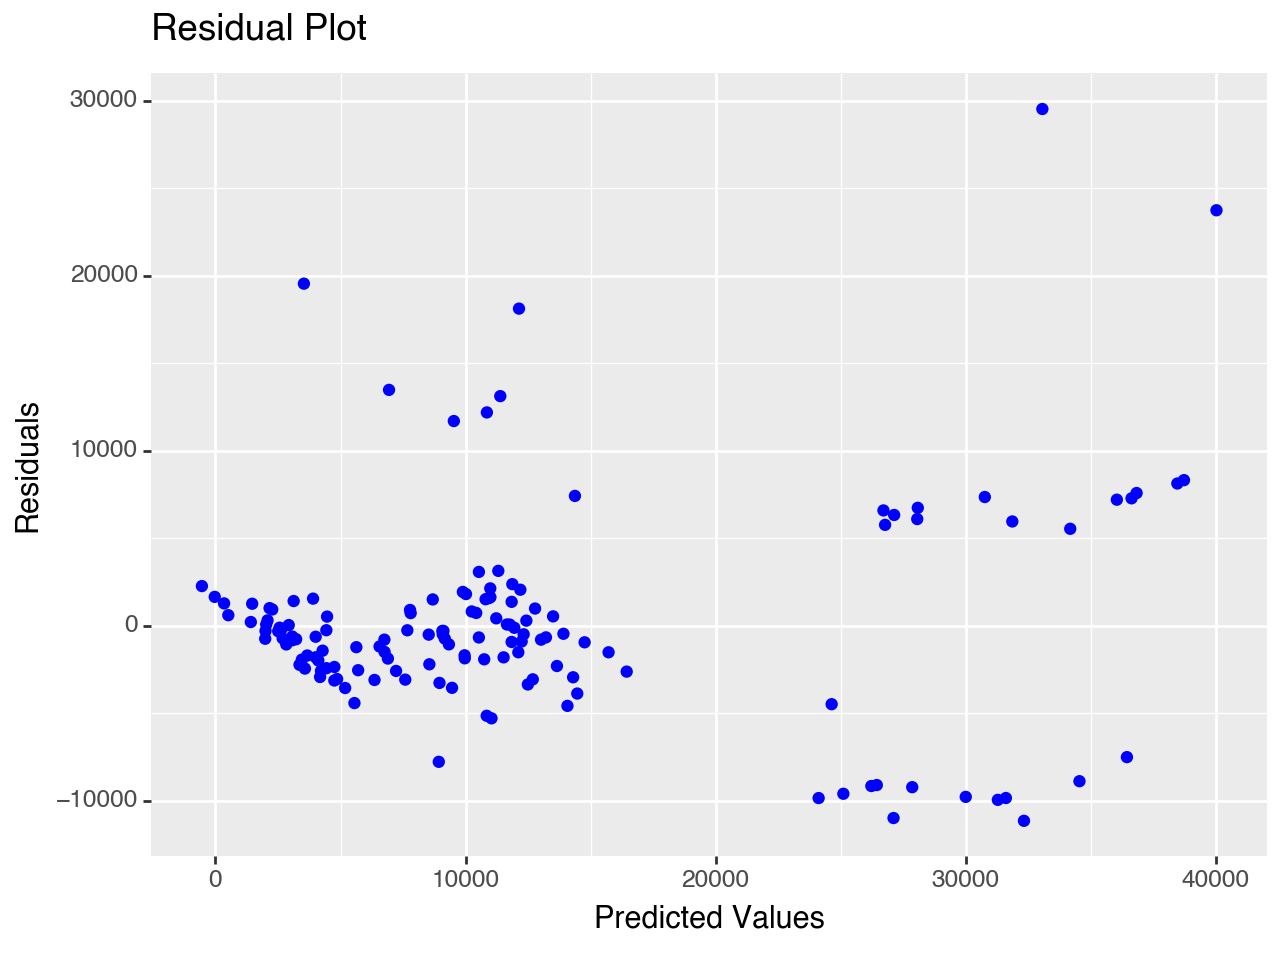

In [83]:
residuals = y_test - y_preds

residual_plot = ggplot(aes(x='y_preds', y=residuals)) + \
    geom_point(color='blue') + \
    labs(title='Residual Plot', x='Predicted Values', y='Residuals')

print(residual_plot)